<a href="https://colab.research.google.com/github/Tusk9/gradprojects/blob/main/MagazineBehaviorAnalysisAssign3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy import stats
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn import svm
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.inspection import permutation_importance

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split


In [ ]:
df = pd.read_excel("/marketing_campaign.xlsx")
print(df.shape)

(2240, 29)


In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
df['Income'] = df['Income'].fillna(df.Income.mean(), axis = 0)
#fill the na value with the mean of income ,since we can not drop the na simply or fill it simply with 0 in this case
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [ ]:
#checking duplicates
df.duplicated().sum()

0

In [ ]:
#datatype check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2240 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
#converting the Dt_Customer object to date type column, and dividing onto three columns and dropping
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Year_Customer'] = df['Dt_Customer'].apply(lambda x: x.year)
df['Month_Customer'] = df['Dt_Customer'].apply(lambda x: x.month)
df['Day_Customer'] = df['Dt_Customer'].apply(lambda x: x.day)
df = df.drop('Dt_Customer', axis=1)

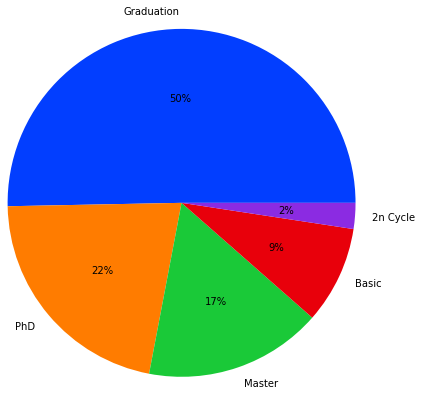

In [ ]:
palette_color = sns.color_palette('bright')

label = df['Education'].unique().tolist()

plt.pie(df['Education'].value_counts(), labels=label, colors=palette_color, autopct='%.0f%%', radius = 2)

# displaying chart
plt.show()

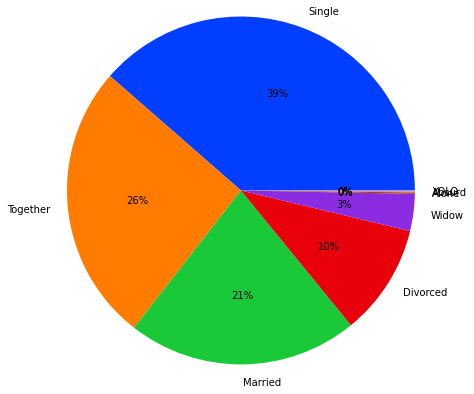

In [ ]:
palette_color = sns.color_palette('bright')

label = df['Marital_Status'].unique().tolist()

plt.pie(df['Marital_Status'].value_counts(), labels=label, colors=palette_color, autopct='%.0f%%', radius = 2)

# displaying chart
plt.show()

In [ ]:
#encode the education column
le=LabelEncoder()
label=le.fit_transform(df['Education'])
label
df.drop('Education',axis=1)
df['Education']=label

In [ ]:
label1=le.fit_transform(df['Marital_Status'])#encode the marital_Status column
df.drop('Marital_Status',axis=1)
df['Marital_Status']=label1
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Year_Customer,Month_Customer,Day_Customer
0,5524,1957,2,4,58138.0,0,0,58,635,88,...,0,0,0,0,3,11,1,2012,9,4
1,2174,1954,2,4,46344.0,1,1,38,11,1,...,0,0,0,0,3,11,0,2014,3,8
2,4141,1965,2,5,71613.0,0,0,26,426,49,...,0,0,0,0,3,11,0,2013,8,21
3,6182,1984,2,5,26646.0,1,0,26,11,4,...,0,0,0,0,3,11,0,2014,2,10
4,5324,1981,4,3,58293.0,1,0,94,173,43,...,0,0,0,0,3,11,0,2014,1,19


In [ ]:
#Dropping unnesessary variables

df = df.drop(['AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response'],axis=1)

In [ ]:
df.shape

(2240, 26)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


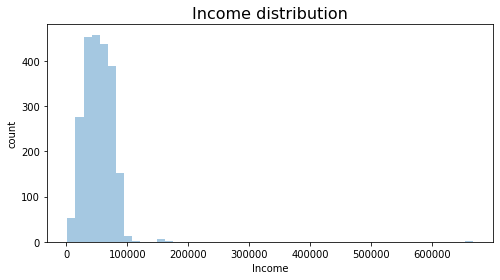

In [ ]:
#Visualizations
plt.figure(figsize = (8,4))
sns.distplot(df['Income'], kde = False, hist = True)
plt.title('Income distribution', size = 16)
plt.ylabel('count');

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9ec29ef310>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9ec29efd90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9ec29e5d50>],
 'medians': [<matplotlib.lines.Line2D at 0x7f9ec29f7890>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f9ec29f7dd0>],
 'means': []}

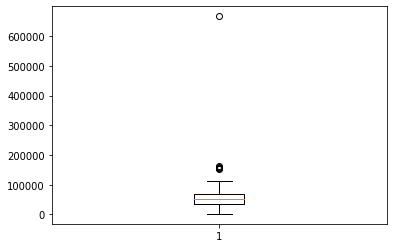

In [ ]:
plt.boxplot(df.Income)

Text(0.5, 1.0, 'Highly Intrested')

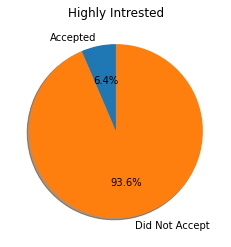

In [ ]:
# pie chart gives information about customers accepting on 1st campaign

label = ['Accepted', 'Did Not Accept']
plt.pie([len(df['AcceptedCmp1'] [df['AcceptedCmp1'] == 1]), len(df['AcceptedCmp1'] [df['AcceptedCmp1'] == 0])], labels = label, autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.title('Highly Intrested')

In [ ]:
#filtering the features with only one class or single value and drop
for col in df.columns :
    if len(df[col].value_counts()) == 1 :
        print(df[col].value_counts())

3    2240
Name: Z_CostContact, dtype: int64
11    2240
Name: Z_Revenue, dtype: int64


In [ ]:
df = df.drop(['ID','Z_CostContact','Z_Revenue'],axis=1)

df.shape

(2240, 23)

In [ ]:
y=df['AcceptedCmp1']#specify the dependent variable and independent variable
x=df.drop(['AcceptedCmp1'],axis=1)
x

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Year_Customer,Month_Customer,Day_Customer
0,1957,2,4,58138.0,0,0,58,635,88,546,...,88,3,8,10,4,7,0,2012,9,4
1,1954,2,4,46344.0,1,1,38,11,1,6,...,6,2,1,1,2,5,0,2014,3,8
2,1965,2,5,71613.0,0,0,26,426,49,127,...,42,1,8,2,10,4,0,2013,8,21
3,1984,2,5,26646.0,1,0,26,11,4,20,...,5,2,2,0,4,6,0,2014,2,10
4,1981,4,3,58293.0,1,0,94,173,43,118,...,15,5,5,3,6,5,0,2014,1,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,2,3,61223.0,0,1,46,709,43,182,...,247,2,9,3,4,5,0,2013,6,13
2236,1946,4,5,64014.0,2,1,56,406,0,30,...,8,7,8,2,5,7,0,2014,6,10
2237,1981,2,2,56981.0,0,0,91,908,48,217,...,24,1,2,3,13,6,0,2014,1,25
2238,1956,3,5,69245.0,0,1,8,428,30,214,...,61,2,6,5,10,3,0,2014,1,24


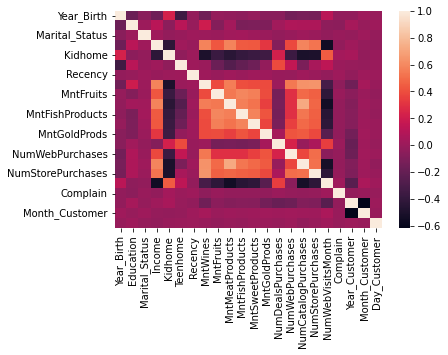

In [ ]:
corr_matrix=x.corr()#check correlation
sns.heatmap(corr_matrix)

In [ ]:
corr_matrix

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Year_Customer,Month_Customer,Day_Customer
Year_Birth,1.000000,-0.171390,-0.060580,-0.160942,0.230176,-0.352111,-0.019871,-0.157773,-0.017917,-0.030872,...,-0.061818,-0.060846,-0.145040,-0.121275,-0.128272,0.121139,-0.030128,-0.028188,0.024246,-0.009193
Education,-0.171390,1.000000,0.007090,0.119974,-0.045564,0.118485,-0.011728,0.197576,-0.080412,0.033625,...,-0.095489,0.030075,0.081908,0.070782,0.070483,-0.040281,-0.050540,0.045356,-0.011304,0.018291
Marital_Status,-0.060580,0.007090,1.000000,0.021267,-0.022553,-0.003596,0.014159,0.008205,0.000593,0.030689,...,0.001688,-0.021772,-0.001894,0.015125,0.001412,-0.031210,-0.005718,-0.018176,0.017708,-0.016087
Income,-0.160942,0.119974,0.021267,1.000000,-0.425176,0.019018,-0.003946,0.576789,0.428747,0.577802,...,0.321978,-0.082290,0.380550,0.586725,0.526489,-0.549824,-0.027223,0.022366,-0.014888,-0.031058
Kidhome,0.230176,-0.045564,-0.022553,-0.425176,1.000000,-0.036133,0.008827,-0.496297,-0.372581,-0.437129,...,-0.349595,0.221798,-0.361647,-0.502237,-0.499683,0.447846,0.040207,0.053339,-0.023571,-0.001718
Teenhome,-0.352111,0.118485,-0.003596,0.019018,-0.036133,1.000000,0.016198,0.004846,-0.176764,-0.261160,...,-0.021725,0.387741,0.155500,-0.110769,0.050695,0.134884,0.003138,-0.008260,-0.014124,0.005697
Recency,-0.019871,-0.011728,0.014159,-0.003946,0.008827,0.016198,1.000000,0.016064,-0.004306,0.023056,...,0.016693,-0.001098,-0.010726,0.025110,0.000799,-0.021445,0.013231,-0.026084,0.014040,0.010877
MntWines,-0.157773,0.197576,0.008205,0.576789,-0.496297,0.004846,0.016064,1.000000,0.389637,0.562667,...,0.387516,0.010940,0.542265,0.635226,0.642100,-0.320653,-0.039007,-0.154188,0.046139,-0.000413
MntFruits,-0.017917,-0.080412,0.000593,0.428747,-0.372581,-0.176764,-0.004306,0.389637,1.000000,0.543105,...,0.392995,-0.132114,0.296735,0.487917,0.461758,-0.418383,-0.005166,-0.055150,0.003741,-0.020998
MntMeatProducts,-0.030872,0.033625,0.030689,0.577802,-0.437129,-0.261160,0.023056,0.562667,0.543105,1.000000,...,0.350609,-0.122415,0.293761,0.723827,0.479659,-0.539470,-0.023483,-0.082472,0.018390,-0.012561


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)#divide the train ,test group
x_train

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Year_Customer,Month_Customer,Day_Customer
1462,1955,4,5,46015.0,1,1,25,38,0,2,...,6,1,1,0,3,7,0,2014,4,13
1124,1954,2,3,46734.0,0,1,40,110,5,137,...,29,2,6,1,5,7,0,2012,11,18
1755,1979,1,4,16014.0,1,1,42,3,9,4,...,7,4,1,1,4,3,0,2013,3,17
2130,1976,2,2,30992.0,1,0,83,17,0,14,...,2,1,1,0,3,7,0,2013,4,22
1672,1986,3,3,80141.0,0,0,20,1184,102,673,...,40,1,7,4,10,6,0,2013,1,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,1980,2,3,47850.0,1,0,72,42,7,43,...,10,1,3,0,4,6,0,2013,12,3
539,1981,3,4,22944.0,1,0,67,19,3,19,...,26,3,3,0,3,7,0,2013,12,23
835,1956,2,3,71391.0,0,1,50,336,123,274,...,141,5,6,5,12,3,0,2013,3,29
1282,1957,4,3,37633.0,1,1,49,13,4,20,...,1,2,1,0,3,9,0,2012,9,20


In [ ]:
Xlog2 = sm.add_constant(x)
logr_model = sm.Logit(y, Xlog2)
logr_fit = logr_model.fit()
print(logr_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


         Current function value: 0.154238
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:           AcceptedCmp1   No. Observations:                 2240
Model:                          Logit   Df Residuals:                     2217
Method:                           MLE   Df Model:                           22
Date:                Mon, 21 Nov 2022   Pseudo R-squ.:                  0.3536
Time:                        02:33:45   Log-Likelihood:                -345.49
converged:                      False   LL-Null:                       -534.47
Covariance Type:            nonrobust   LLR p-value:                 1.439e-66
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -2021.4856    441.868     -4.575      0.000   -2887.530   -1155.441
Year_Birth              0.0041      0.

In [ ]:
# Checking accuracy of the model with all variables
# Lets check accuracy, precision, recall of this model


from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
logistic_regression = LogisticRegression()
model = logistic_regression.fit(x,y)

#Predict the response for test dataset
y_pred = model.predict(x_test)

cm=confusion_matrix(y_test, y_pred)#confusion matrix for the logistic model prediction
print("Confusion Matrix:",cm)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

print(classification_report(y_test,y_pred))

Confusion Matrix: [[415   4]
 [ 25   4]]
Accuracy: 0.9352678571428571
Precision: 0.5
Recall: 0.13793103448275862
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       419
           1       0.50      0.14      0.22        29

    accuracy                           0.94       448
   macro avg       0.72      0.56      0.59       448
weighted avg       0.91      0.94      0.92       448



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
#Removing non important
print(logr_fit.pvalues > 0.1)

const                  False
Year_Birth              True
Education              False
Marital_Status         False
Income                 False
Kidhome                 True
Teenhome               False
Recency                 True
MntWines               False
MntFruits               True
MntMeatProducts         True
MntFishProducts        False
MntSweetProducts       False
MntGoldProds            True
NumDealsPurchases       True
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases       True
NumWebVisitsMonth       True
Complain                True
Year_Customer          False
Month_Customer         False
Day_Customer            True
dtype: bool


In [ ]:
non_imp = [ 'Year_Birth', 'Kidhome', 'Recency', 'MntFruits', 'MntMeatProducts',
                    'MntGoldProds', 'NumDealsPurchases','NumStorePurchases','NumWebVisitsMonth','Complain','Day_Customer']

In [ ]:
df_log = df.drop(columns=non_imp)

In [ ]:
y=df_log['AcceptedCmp1']#specify the dependent variable and independent variable
x=df_log.drop(['AcceptedCmp1'],axis=1)
Xlog2 = sm.add_constant(x)
logr_model = sm.Logit(y, Xlog2)
logr_fit = logr_model.fit()
print(logr_fit.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.156414
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:           AcceptedCmp1   No. Observations:                 2240
Model:                          Logit   Df Residuals:                     2228
Method:                           MLE   Df Model:                           11
Date:                Mon, 21 Nov 2022   Pseudo R-squ.:                  0.3445
Time:                        02:33:45   Log-Likelihood:                -350.37
converged:                       True   LL-Null:                       -534.47
Covariance Type:            nonrobust   LLR p-value:                 3.406e-72
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -1800.1192    389.274     -4.624      0.000   -2563.082   -1037.157
E

In [ ]:

y=df_log[['AcceptedCmp1']]
X=df_log.drop(['AcceptedCmp1'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=109)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
logistic_regression = LogisticRegression()
model = logistic_regression.fit(X,y)

#Predict the response for test dataset
y_pred = model.predict(X_test)
cm=confusion_matrix(y_test, y_pred)#confusion matrix for the logistic model prediction
print("Confusion Matrix:",cm)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

print(classification_report(y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion Matrix: [[411   1]
 [ 33   3]]
Accuracy: 0.9241071428571429
Precision: 0.75
Recall: 0.08333333333333333
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       412
           1       0.75      0.08      0.15        36

    accuracy                           0.92       448
   macro avg       0.84      0.54      0.56       448
weighted avg       0.91      0.92      0.90       448



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
##SVM
# Import train_test_split function
from sklearn.model_selection import train_test_split

y=df[['AcceptedCmp1']]
X=df.drop(['AcceptedCmp1'],axis=1)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=109) # 80% training and 20% test

In [ ]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
X_test

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Year_Customer,Month_Customer,Day_Customer
210,1956,2,5,46097.0,0,1,11,72,24,68,...,8,5,3,1,6,4,0,2013,3,31
962,1969,3,5,41021.0,1,0,12,14,7,9,...,12,2,2,0,3,6,0,2012,12,30
1686,1980,3,2,78789.0,0,0,12,667,50,850,...,83,1,4,6,5,2,0,2012,8,8
908,1974,2,5,47889.0,1,0,94,29,0,29,...,4,1,2,0,3,5,0,2014,1,4
219,1980,2,5,69508.0,1,0,48,824,32,162,...,43,2,11,4,11,6,0,2012,11,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1894,1974,2,4,69719.0,0,0,99,273,86,208,...,43,1,2,3,5,1,0,2014,5,26
325,1957,2,3,62187.0,0,0,49,792,0,275,...,126,1,4,8,5,3,0,2013,7,5
263,1978,4,3,37717.0,1,0,31,9,0,6,...,5,1,1,0,2,9,0,2012,11,23
1262,1982,3,5,73450.0,0,0,85,1142,51,415,...,37,1,7,8,11,3,0,2013,12,5


In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

y_pred=clf.predict(X_test)
print(classification_report(y_test,y_pred))

cm1=confusion_matrix(y_test, y_pred)#confusion matrix for the svm model prediction
print(cm1)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       412
           1       0.36      0.11      0.17        36

    accuracy                           0.91       448
   macro avg       0.65      0.55      0.56       448
weighted avg       0.88      0.91      0.89       448

[[405   7]
 [ 32   4]]
Accuracy: 0.9129464285714286
Precision: 0.36363636363636365
Recall: 0.1111111111111111
